In [34]:
# Data preparation
import pandas as pd

try:
    file_path = r"File_Path"
    df = pd.read_excel(file_path)
    display(df.head())
    print(df.shape)
except FileNotFoundError:
    print("Error: File not found. Please ensure the file 'File_Path' is in the current directory or provide the correct path.")
    df = None
except Exception as e:
    print(f"An unexpected error occurred: {e}")
    df = None

,AIGL,PT,FE,PA1,PA2,PA3,PA4,AT1,AT2,AT3,...,PD3,PD4,PC1,PC2,PC3,PC4,Mean_WP,Mean_PD,Mean_PC,Ave_PI
0,1,1,1,6,6,6,6,6,5,6,...,7,7,6,6,6,6,5.25,7.00,6.00,6.083333
1,1,1,1,7,6,5,6,7,3,4,...,6,6,5,5,6,7,4.50,5.75,5.75,5.333333
2,1,1,1,7,6,5,4,7,5,5,...,5,5,5,5,6,6,1.25,4.00,5.50,3.583333
3,1,1,1,5,5,3,4,3,6,5,...,5,4,3,4,5,5,4.50,4.50,4.25,4.416667
4,1,1,1,5,5,5,5,5,5,5,...,6,4,6,6,6,6,6.00,5.50,6.00,5.833333


(37, 47)


In [35]:
# Check data types
print(df.dtypes)

# Get the shape of the DataFrame
print("\nDataFrame Shape:", df.shape)

# Check for missing values in specified columns
print("\nMissing Values:")
print(df[['PA1', 'PA2', 'PA3', 'PA4']].isnull().sum())

# Analyze the two 'PA3' columns for potential duplication
print("\nAnalysis of 'PA3' columns:")
if 'PA3' in df.columns:
    # Assuming there's only one 'PA3', check if it is the same as PA4
    print("Comparing 'PA3' and 'PA4':")
    print((df['PA3'] == df['PA4']).value_counts())
    # If there are two 'PA3' columns (unlikely but possible)
else:
    print("There is no 'PA3' column in the DataFrame.")

AIGL         int64
PT           int64
FE           int64
PA1          int64
PA2          int64
PA3          int64
PA4          int64
AT1          int64
AT2          int64
AT3          int64
R1           int64
R2           int64
R3           int64
Mean_PA    float64
Mean_AT    float64
Mean_R     float64
Ave_PA     float64
SL1          int64
SL2          int64
SL3          int64
TS1          int64
TS2          int64
TS3          int64
BC1          int64
BC2          int64
BC3          int64
BC4          int64
Mean_SL    float64
Mean_TS    float64
Mean_BC    float64
Ave_CT     float64
WP1          int64
WP2          int64
WP3          int64
WP4          int64
PD1          int64
PD2          int64
PD3          int64
PD4          int64
PC1          int64
PC2          int64
PC3          int64
PC4          int64
Mean_WP    float64
Mean_PD    float64
Mean_PC    float64
Ave_PI     float64
dtype: object

DataFrame Shape: (37, 47)

Missing Values:
PA1    0
PA2    0
PA3    0
PA4    0
dtype: int64


In [36]:
# Display Indicator
print(df.columns.tolist())

['AIGL', 'PT', 'FE', 'PA1', 'PA2', 'PA3', 'PA4', 'AT1', 'AT2', 'AT3', 'R1', 'R2', 'R3', 'Mean_PA', 'Mean_AT', 'Mean_R', 'Ave_PA', 'SL1', 'SL2', 'SL3', 'TS1', 'TS2', 'TS3', 'BC1', 'BC2', 'BC3', 'BC4', 'Mean_SL', 'Mean_TS', 'Mean_BC', 'Ave_CT', 'WP1', 'WP2', 'WP3', 'WP4', 'PD1', 'PD2', 'PD3', 'PD4', 'PC1', 'PC2', 'PC3', 'PC4', 'Mean_WP', 'Mean_PD', 'Mean_PC', 'Ave_PI']


In [37]:
from scipy.stats import pearsonr

# Define indicator and items
indikator_items = {
    'Perceived authenticity': ['PA1', 'PA2', 'PA3', 'PA4'],
    'Attitude toward virtual item': ['AT1', 'AT2', 'AT3'],
    'Reputation': ['R1', 'R2', 'R3'],
    'Store loyalty': ['SL1', 'SL2', 'SL3'],
    'Trust Stance': ['TS1', 'TS2', 'TS3'],
    'Brand credibility': ['BC1', 'BC2', 'BC3', 'BC4'],
    'Willingness-to-pay': ['WP1', 'WP2', 'WP3', 'WP4'],
    'Purchase decision': ['PD1', 'PD2', 'PD3', 'PD4'],
    'Purchase convenience': ['PC1', 'PC2', 'PC3', 'PC4']
}

# r-table for n = 198 and α = 0.05
r_tabel = 0.3246 

# Return to the list
hasil_validitas = []

for indikator, items in indikator_items.items():
    # Count the total indicator and item
    df[f'total_{indikator}'] = df[items].sum(axis=1)

    for item in items:
        df[f'total_lain'] = df[f'total_{indikator}'] - df[item]
        r, p = pearsonr(df[item], df['total_lain'])

        hasil_validitas.append({
            'Indikator': indikator,
            'Item': item,
            'r-hitung': round(r, 4),
            'Valid': 'Ya' if r >= r_tabel else 'Tidak'
        })
        
tabel_validitas = pd.DataFrame(hasil_validitas)

# Display the table of validity analysis
tabel_validitas

,Indikator,Item,r-hitung,Valid
0,Perceived authenticity,PA1,0.7976,Ya
1,Perceived authenticity,PA2,0.7960,Ya
2,Perceived authenticity,PA3,0.7373,Ya
3,Perceived authenticity,PA4,0.7293,Ya
4,Attitude toward virtual item,AT1,0.4096,Ya
5,Attitude toward virtual item,AT2,0.5236,Ya
6,Attitude toward virtual item,AT3,0.6236,Ya
7,Reputation,R1,0.7666,Ya
8,Reputation,R2,0.7859,Ya
9,Reputation,R3,0.8620,Ya


In [38]:
import numpy as np

# Define the indicator and items
indikator_items = {
    'Perceived authenticity': ['PA1', 'PA2', 'PA3', 'PA4'],
    'Attitude toward virtual item': ['AT1', 'AT2', 'AT3'],
    'Reputation': ['R1', 'R2', 'R3'],
    'Store loyalty': ['SL1', 'SL2', 'SL3'],
    'Trust Stance': ['TS1', 'TS2', 'TS3'],
    'Brand credibility': ['BC1', 'BC2', 'BC3', 'BC4'],
    'Willingness-to-pay': ['WP1', 'WP2', 'WP3', 'WP4'],
    'Purchase decision': ['PD1', 'PD2', 'PD3', 'PD4'],
    'Purchase convenience': ['PC1', 'PC2', 'PC3', 'PC4']
}

# Cronbach's Alpha function
def cronbach_alpha(items_scores):
    items_scores = np.array(items_scores)
    item_variances = items_scores.var(axis=0, ddof=1)
    total_score_variance = items_scores.sum(axis=1).var(ddof=1)
    n_items = items_scores.shape[1]
    alpha = (n_items / (n_items - 1)) * (1 - item_variances.sum() / total_score_variance)
    return alpha

hasil_reliabilitas = []

for indikator, items in indikator_items.items():
    if all(item in df.columns for item in items):
        skor_item = df[items]
        alpha = cronbach_alpha(skor_item)
        hasil_reliabilitas.append({
            'Indikator': indikator,
            'Item': ', '.join(items),
            'Cronbach\'s Alpha': round(alpha, 3),
            'Reliabel': 'Ya' if alpha >= 0.6 else 'Tidak'
        })

tabel_reliabilitas = pd.DataFrame(hasil_reliabilitas)

# Display table of realibility analysis
tabel_reliabilitas

,Indikator,Item,Cronbach's Alpha,Reliabel
0,Perceived authenticity,"PA1, PA2, PA3, PA4",0.891,Ya
1,Attitude toward virtual item,"AT1, AT2, AT3",0.699,Ya
2,Reputation,"R1, R2, R3",0.900,Ya
3,Store loyalty,"SL1, SL2, SL3",0.829,Ya
4,Trust Stance,"TS1, TS2, TS3",0.893,Ya
5,Brand credibility,"BC1, BC2, BC3, BC4",0.928,Ya
6,Willingness-to-pay,"WP1, WP2, WP3, WP4",0.901,Ya
7,Purchase decision,"PD1, PD2, PD3, PD4",0.892,Ya
8,Purchase convenience,"PC1, PC2, PC3, PC4",0.909,Ya


In [39]:
import pandas as pd

# Calculate descriptive statistics
descriptive_stats = df[['PA1', 'PA2', 'PA3', 'PA4']].describe()

# Calculate the correlation matrix
correlation_matrix = df[['PA1', 'PA2', 'PA3', 'PA4']].corr()

# Display the descriptive statistics
display(descriptive_stats)

# Display the correlation matrix
display(correlation_matrix)

# Interpret correlations (example, adjust based on actual values)
print("\nCorrelation Interpretation:")
if correlation_matrix['PA1']['PA2'] > 0.5:
    print("Strong positive correlation between PA1 and PA2.")
elif correlation_matrix['PA1']['PA2'] < -0.5:
    print("Strong negative correlation between PA1 and PA2.")
else:
    print("No significant correlation observed between PA1 and PA2.")

# Add more interpretations for other variable pairs as needed

,PA1,PA2,PA3,PA4
count,37.000000,37.000000,37.000000,37.000000
mean,5.648649,5.432432,4.918919,5.324324
std,1.418454,1.214279,1.497746,1.225970
min,1.000000,1.000000,1.000000,1.000000
25%,5.000000,5.000000,4.000000,5.000000
50%,6.000000,6.000000,5.000000,6.000000
75%,6.000000,6.000000,6.000000,6.000000
max,7.000000,7.000000,7.000000,7.000000


,PA1,PA2,PA3,PA4
PA1,1.000000,0.864776,0.626897,0.626423
PA2,0.864776,1.000000,0.630757,0.593572
PA3,0.626897,0.630757,1.000000,0.725732
PA4,0.626423,0.593572,0.725732,1.000000



Correlation Interpretation:
Strong positive correlation between PA1 and PA2.


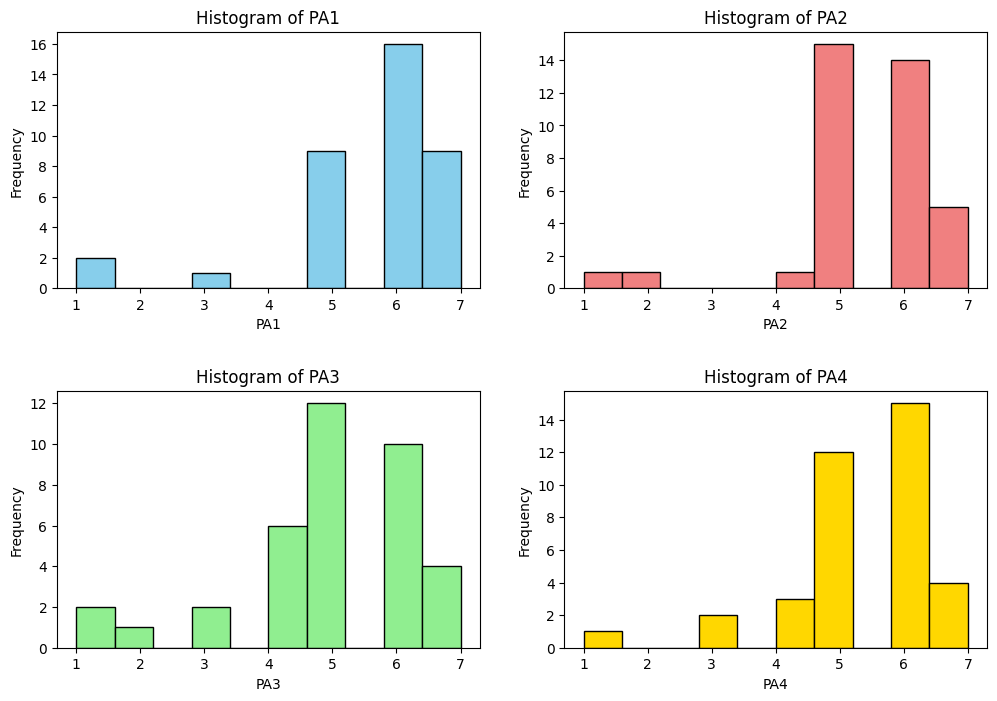

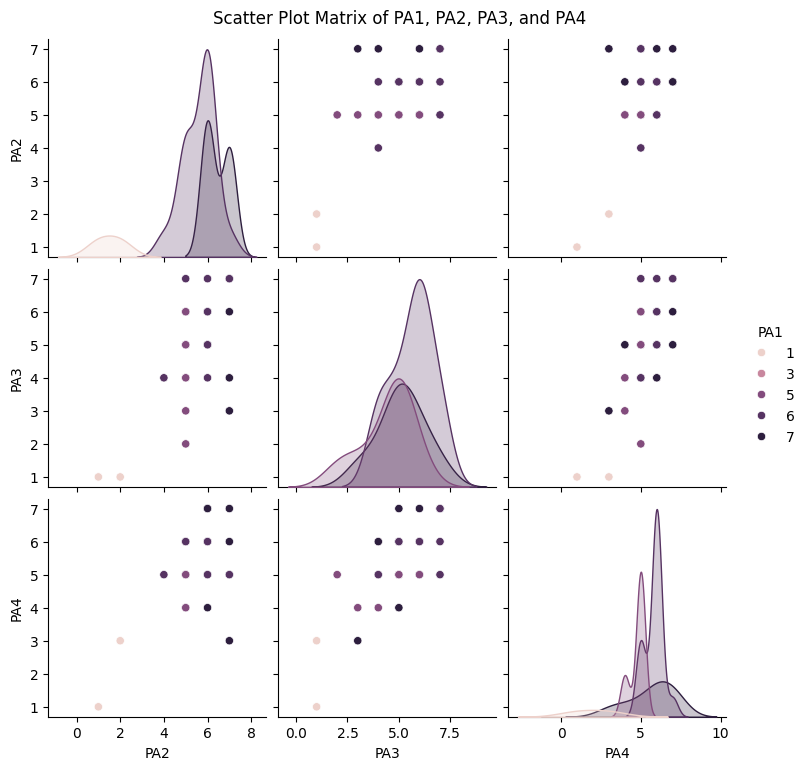

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograms
plt.figure(figsize=(12, 8))
plt.subplots_adjust(hspace=0.4)

plt.subplot(2, 2, 1)
plt.hist(df['PA1'], bins=10, color='skyblue', edgecolor='black')
plt.xlabel('PA1')
plt.ylabel('Frequency')
plt.title('Histogram of PA1')

plt.subplot(2, 2, 2)
plt.hist(df['PA2'], bins=10, color='lightcoral', edgecolor='black')
plt.xlabel('PA2')
plt.ylabel('Frequency')
plt.title('Histogram of PA2')

plt.subplot(2, 2, 3)
plt.hist(df['PA3'], bins=10, color='lightgreen', edgecolor='black')
plt.xlabel('PA3')
plt.ylabel('Frequency')
plt.title('Histogram of PA3')

plt.subplot(2, 2, 4)
plt.hist(df['PA4'], bins=10, color='gold', edgecolor='black')
plt.xlabel('PA4')
plt.ylabel('Frequency')
plt.title('Histogram of PA4')

plt.show()


# Scatter plot matrix
sns.pairplot(df[['PA1', 'PA2', 'PA3', 'PA4']], diag_kind='kde', hue='PA1')
plt.suptitle('Scatter Plot Matrix of PA1, PA2, PA3, and PA4', y=1.02)
plt.show()


Range Check:
PA1: Min = 1, Max = 7
PA2: Min = 1, Max = 7
PA3: Min = 1, Max = 7
PA4: Min = 1, Max = 7

Missing Values:
PA1    0
PA2    0
PA3    0
PA4    0
dtype: int64

Outlier Detection (Box Plots):


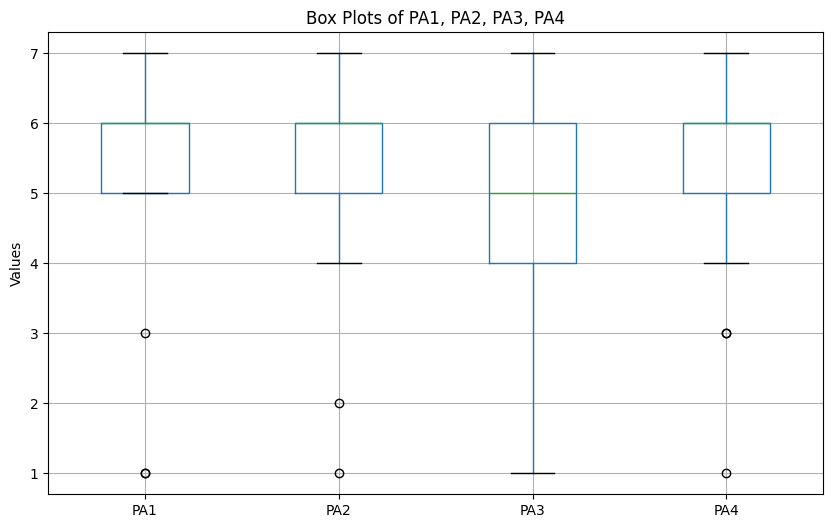

In [41]:
# Validity Analysis for PA1, PA2, PA3, and PA4

# Range Check:  Verify if the values fall within the expected range based on the questionnaire.
print("\nRange Check:")
for col in ['PA1', 'PA2', 'PA3', 'PA4']:
    min_val = df[col].min()
    max_val = df[col].max()
    print(f"{col}: Min = {min_val}, Max = {max_val}")
    # Add checks for expected ranges. For example, if all responses are 1-5:
    if min_val < 1 or max_val > 5:
        print(f"Warning: Values in {col} are outside the expected range of 1 to 5.")


# Missing Value Analysis (already done in previous code, but included here for completeness)
print("\nMissing Values:")
print(df[['PA1', 'PA2', 'PA3', 'PA4']].isnull().sum())


# Outlier Detection: Use box plots to visually identify outliers
print("\nOutlier Detection (Box Plots):")
plt.figure(figsize=(10, 6))
df[['PA1', 'PA2', 'PA3', 'PA4']].boxplot()
plt.title("Box Plots of PA1, PA2, PA3, PA4")
plt.ylabel("Values")
plt.show()